<a href="https://colab.research.google.com/github/suwaid1/scout/blob/main/UK_Sample_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import requests

In [ ]:
data_910 = pd.read_csv('/content/onlineretail910.csv', encoding='latin1')
data_1112 = pd.read_csv('/content/onlineretail1112.csv', encoding='latin1')

In [ ]:
data_910 = pd.read_csv('/content/onlineretail910.csv', encoding='latin1')
data_1112 = pd.read_csv('/content/onlineretail1112.csv', encoding='latin1')

In [ ]:
data = pd.concat([data_910, data_1112])
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

     InvoiceDate  Price  Customer ID         Country  
0  01-12-09 7:45   6.95      13085.0  United Kingdom  
1  01-12-09 7:45   6.75      13085.0  United Kingdom  
2  01-12-09 7:45   6.75      13085.0  United Kingdom  
3  01-12-09 7:45   2.10      13085.0  United Kingdom  
4  01-12-09 7:45   1.25      13085.0  United Kingdom  


In [ ]:
# Remove rows with missing values
data.dropna(inplace=True)


In [ ]:
# Convert 'InvoiceDate' from object to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Remove any transactions that are not actual sales (e.g., cancelled orders)
data = data[data['Quantity'] > 0]

# Display the cleaned data
print(data.info())
print(data.describe())

<ipython-input-15-83ff04d8ecb1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB
None
            Quantity                    InvoiceDate          Price  \
count  805620.000000                         805620  805620.000000   
mean       13.307665  2010-12-14 10:55:30.310716928       3.206279   
min         1.000000            2009-01-12 07:45:00       0.000000   
25%         2.000000        

In [ ]:
# Convert 'InvoiceDate' from object to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Remove any transactions that are not actual sales (e.g., cancelled orders)
data = data[data['Quantity'] > 0]

# Display the cleaned data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB
None
            Quantity                    InvoiceDate          Price  \
count  805620.000000                         805620  805620.000000   
mean       13.307665  2010-12-14 10:55:30.310716928       3.206279   
min         1.000000            2009-01-12 07:45:00       0.000000   
25%         2.000000        

In [ ]:
# Adding features for day, month, and year
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Weekday'] = data['InvoiceDate'].dt.weekday

# Aggregate sales data by Month and StockCode to simplify the prediction
monthly_sales = data.groupby(['Year', 'Month', 'StockCode']).agg(Total_Sales=('Quantity', 'sum')).reset_index()

# Display the new aggregated data
print(monthly_sales.head())


   Year  Month StockCode  Total_Sales
0  2009      1     10002           12
1  2009      1     10120           60
2  2009      1     10125            4
3  2009      1     10133            6
4  2009      1     10135           17


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Preparing data for the model
X = monthly_sales.drop('Total_Sales', axis=1)
y = monthly_sales['Total_Sales']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoder to the 'StockCode'
monthly_sales['StockCode'] = label_encoder.fit_transform(monthly_sales['StockCode'])

# Continue with the rest of your feature preparation and model building
X = monthly_sales.drop('Total_Sales', axis=1)
y = monthly_sales['Total_Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now your features should be ready for model training


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
predictions = model.predict(X_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'The Root Mean Square Error of our model is {rmse}')

The Root Mean Square Error of our model is 664.834632879211


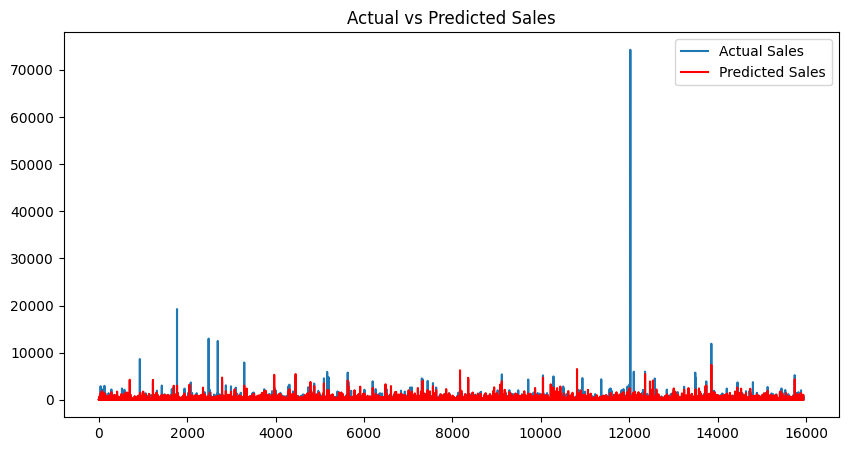

In [ ]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted sales
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


GRID SEARCH

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}


In [ ]:
# Initialize the RandomForest model
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)


In [ ]:
# Assuming X_train and y_train are already defined and are your training datasets
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Best RMSE from Grid Search: {best_rmse}')


Best RMSE from Grid Search: 442.9480054591205


In [ ]:
# Initialize the RandomForest model with the best parameters
optimized_rf = RandomForestRegressor(**best_params, random_state=42)

# Fit the model to the training data
optimized_rf.fit(X_train, y_train)

# Predict on the test set
predictions = optimized_rf.predict(X_test)

# Calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, predictions)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE with Optimized Parameters: {test_rmse}')


Test RMSE with Optimized Parameters: 666.2546173268386


RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

In [ ]:
# Initialize the RandomForest model
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the random search to the training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)